# 🎶 Top Tracks Analysis: Billboard Hot 100 Trends (2019-2023)

This project explores trends in the **Billboard Hot 100** from 2019 to 2023, using data from **Spotify** and **Choosic**. We will analyze:

- **Music Trends**: Dominant genres, BPM, musical keys, happiness and longevity.
- **Artist Trends**: Artist consistency, collaborations, and growth.

The goal is to understand the evolving characteristics of the top tracks and how they reflect shifts in music preferences.

## Data Preparation

In [1]:
# import lyricsgenius
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [2]:
# The following code was commented out to prevent making repeated requests to the Genius API.
#
# token = # Redacted
# genius = lyricsgenius.Genius(token,timeout=720)
# df_2019 = pd.read_csv('Raw_Data/Hot 100 Songs 2019.csv')
# df_2020 = pd.read_csv('Raw_Data/Hot 100 Songs 2020.csv')
# df_2021 = pd.read_csv('Raw_Data/Hot 100 Songs 2021.csv')
# df_2022 = pd.read_csv('Raw_Data/Hot 100 Songs 2022.csv')
# df_2023 = pd.read_csv('Raw_Data/Hot 100 Songs 2023.csv')

# list_df = [df_2019,df_2020,df_2021,df_2022,df_2023]

# for df in list_df:
#     df['Artist'] = df['Artist'].apply(lambda x: x.split(','))
#     df["Lyrics"]=None
#     for song_index in df.index:
#         song_name = df["Song"][song_index]
#         artist_name = df["Artist"][song_index][0]
#         df.loc[song_index,"Lyrics"] = genius.search_song(song_name, artist_name).lyrics

# for year,df in enumerate(list_df,2019):
#     df.to_csv(f'Processed_Data/Hot_100_Songs_{year}.csv')

In [41]:
# Reading datasets

df_2019 = pd.read_csv('Processed_Data/Hot_100_Songs_2019.csv')
df_2020 = pd.read_csv('Processed_Data/Hot_100_Songs_2020.csv')
df_2021 = pd.read_csv('Processed_Data/Hot_100_Songs_2021.csv')
df_2022 = pd.read_csv('Processed_Data/Hot_100_Songs_2022.csv')
df_2023 = pd.read_csv('Processed_Data/Hot_100_Songs_2023.csv')

# List with each year's dataset
list_df = [df_2019,df_2020,df_2021,df_2022,df_2023]
# List with each year
years = ['2019','2020','2021','2022','2023']

# List with all datasets concatenated
df_all = pd.concat(list_df, ignore_index=True)

df_all['Artist'] = df_all['Artist'].apply(ast.literal_eval)

# Number of artists that appeared in the period studied

num_artist = df_all['Artist'].explode().unique().size

# Series with how many times as artist appeared in the period studied

num_repeats_artist = df_all['Artist'].explode().value_counts()

# Lists with artist data

list_num_artist = []
list_num_repeats_artist = []

# Lists with each year's genres values
list_values_parent_genres = []
list_values_genres = []
list_num_unique_parent_genres = []
list_num_unique_genres = []
list_num_pop = []
list_num_hiphop = []
list_num_country = []
list_num_rb = []

# Median BPM list ( I chose to analyse the median bpm instead of the average since it’s less affected by outliers)

list_median_bpm = []

for index,df in enumerate(list_df):
    # treating the artists column
    df['Artist'] = df['Artist'].apply(ast.literal_eval)
    list_num_artist.append(df['Artist'].explode().unique().size)
    list_num_repeats_artist.append(df['Artist'].explode().value_counts())
    # making the contents of 'Parent Genres' into a list
    df['Parent Genres'] = df['Parent Genres'].apply(lambda x: str(x).title().replace(" ","").split(','))
    # making the contents of 'Genres' into a list
    df['Genres'] = df['Genres'].apply(lambda x: str(x).title().replace(" ","").split(','))
    list_values_parent_genres.append(df['Parent Genres'].explode().value_counts())
    list_values_genres.append(df['Genres'].explode().value_counts())
    list_num_unique_parent_genres.append(len(df['Parent Genres'].explode().unique()))
    list_num_unique_genres.append(len(df['Genres'].explode().unique()))
    # Every year, Pop, HiPHop, Country and R&B are on the top 4 parent genres, so I made a list with the number of songs in each gender by year:
    list_num_pop.append(list_values_parent_genres[index]['Pop'])
    list_num_hiphop.append(list_values_parent_genres[index]['HipHop'])
    list_num_country.append(list_values_parent_genres[index]['Country'])
    list_num_rb.append(list_values_parent_genres[index]['R&B'])
    # adding median bpm to the list
    list_median_bpm.append(df["BPM"].quantile(0.5))




## Genres and subgenres

### Genre and subgenre diversity along the years

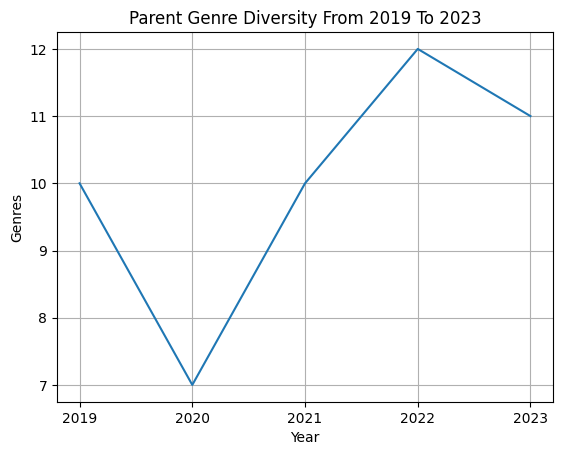

In [4]:
plt.figure()
plt.plot(years,list_num_unique_parent_genres)
plt.title(f'Parent Genre Diversity From {years[0]} To {years[-1]}')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

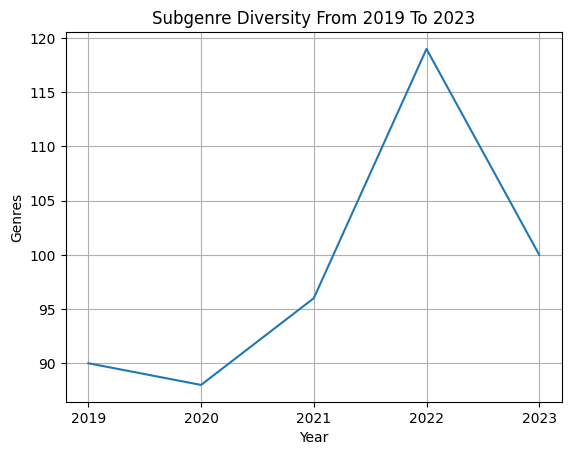

In [5]:
plt.figure()
plt.plot(years,list_num_unique_genres)
plt.title(f'Subgenre Diversity From {years[0]} To {years[-1]}')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

### Genres and subgenres present each year

--------------------------------------------------
2019
Number of unique subgenre occurrences: 90


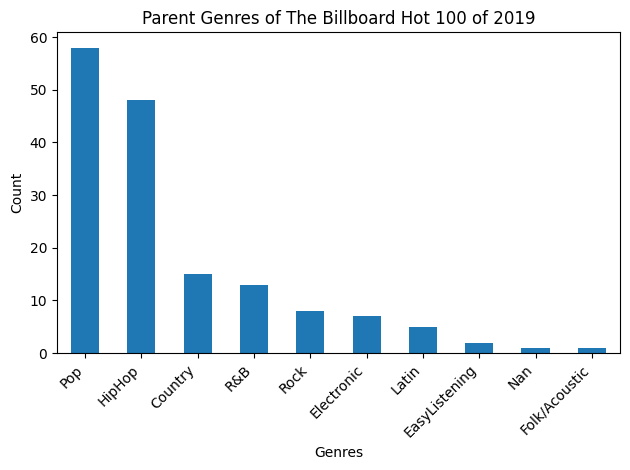

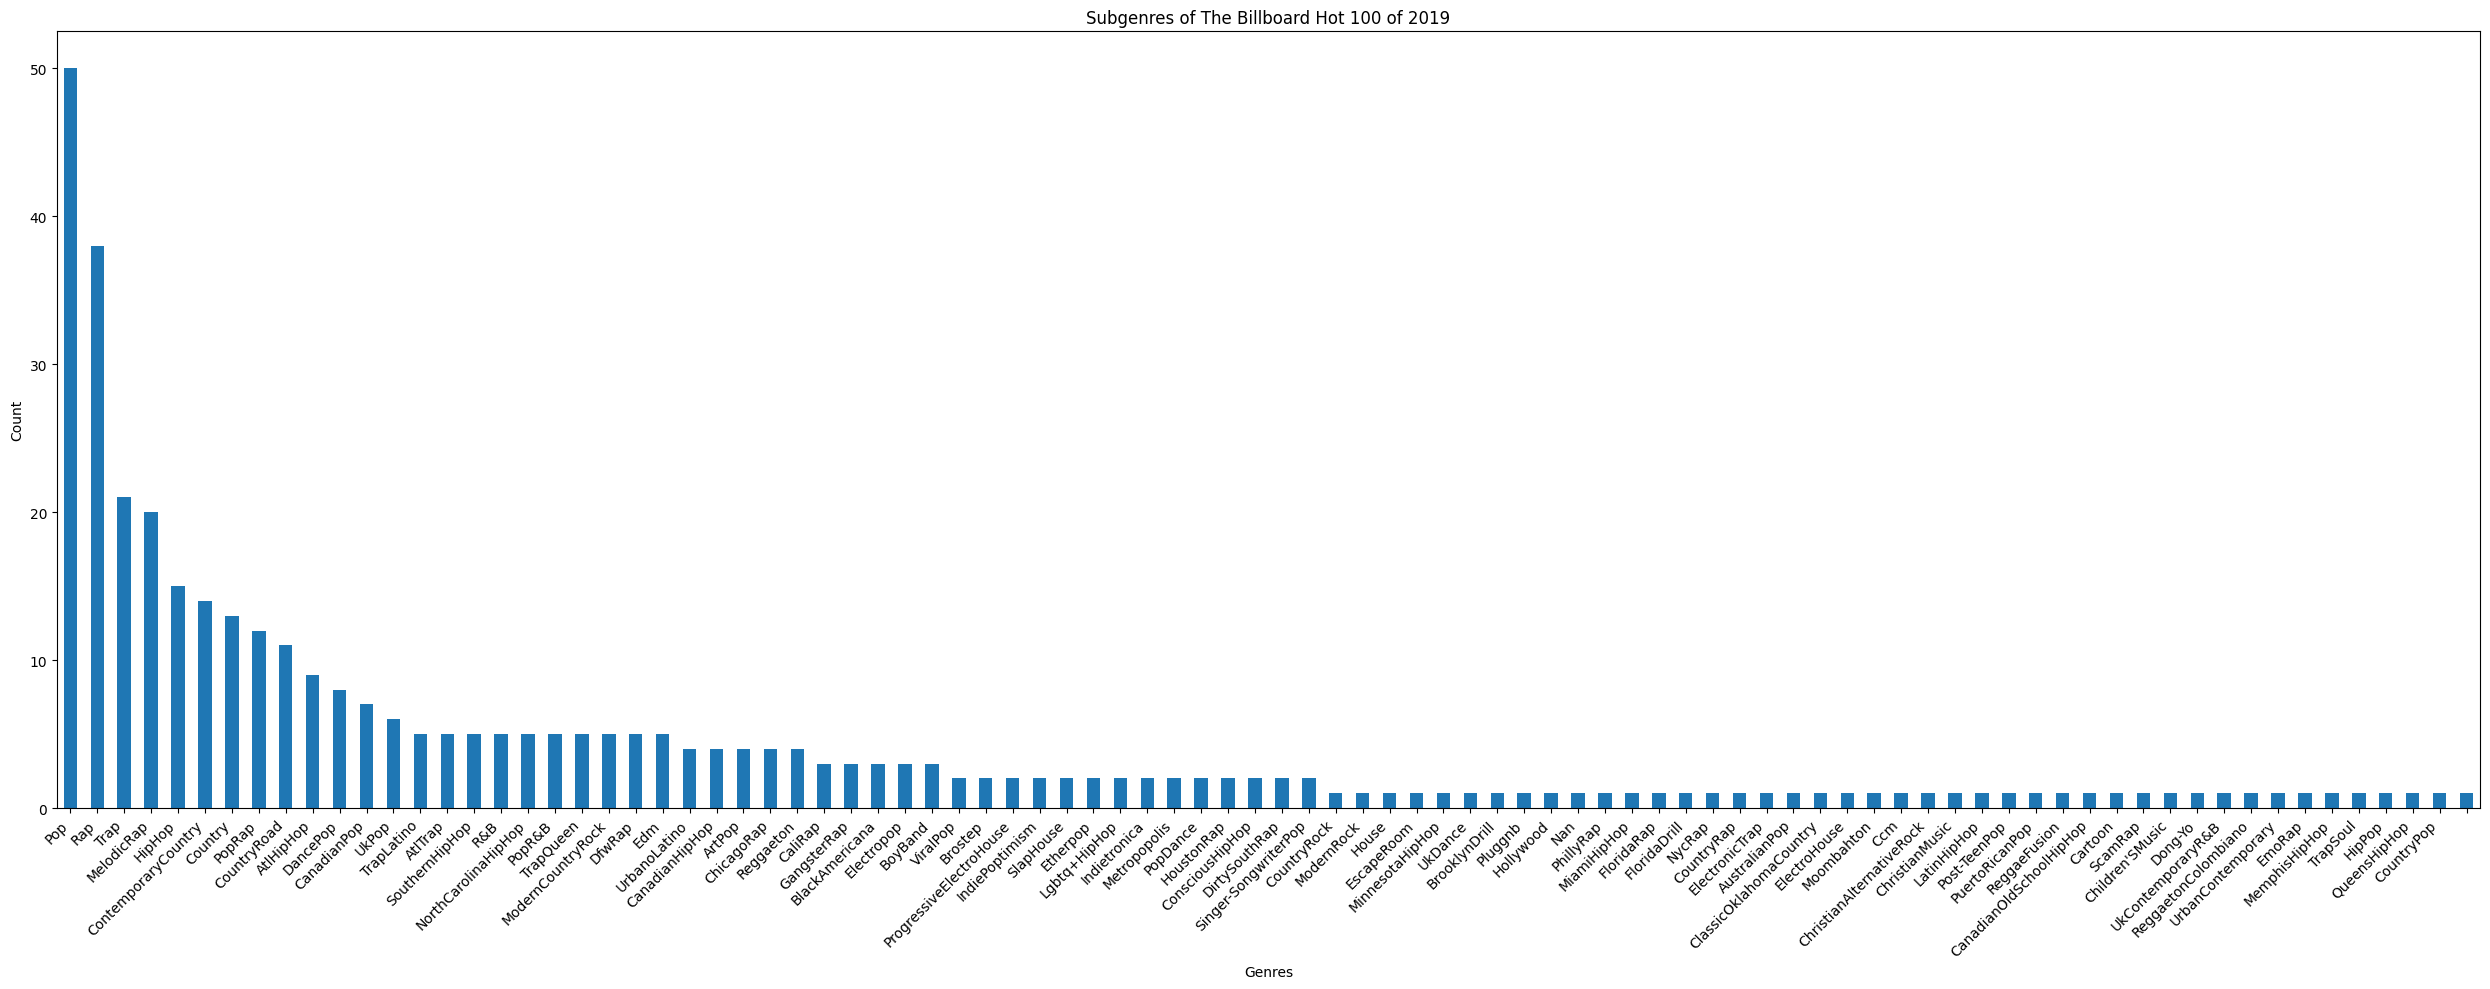

--------------------------------------------------
2020
Number of unique subgenre occurrences: 88


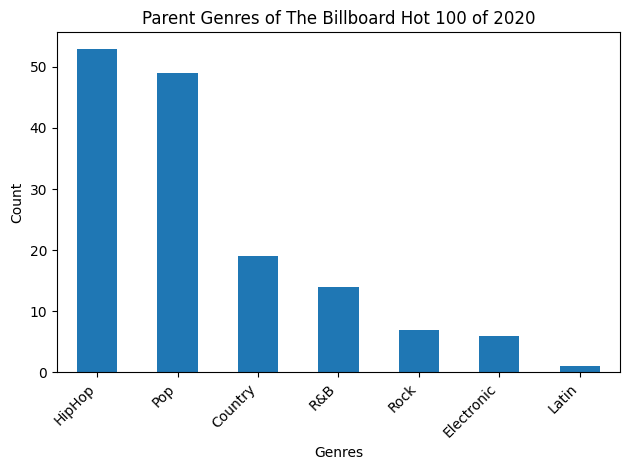

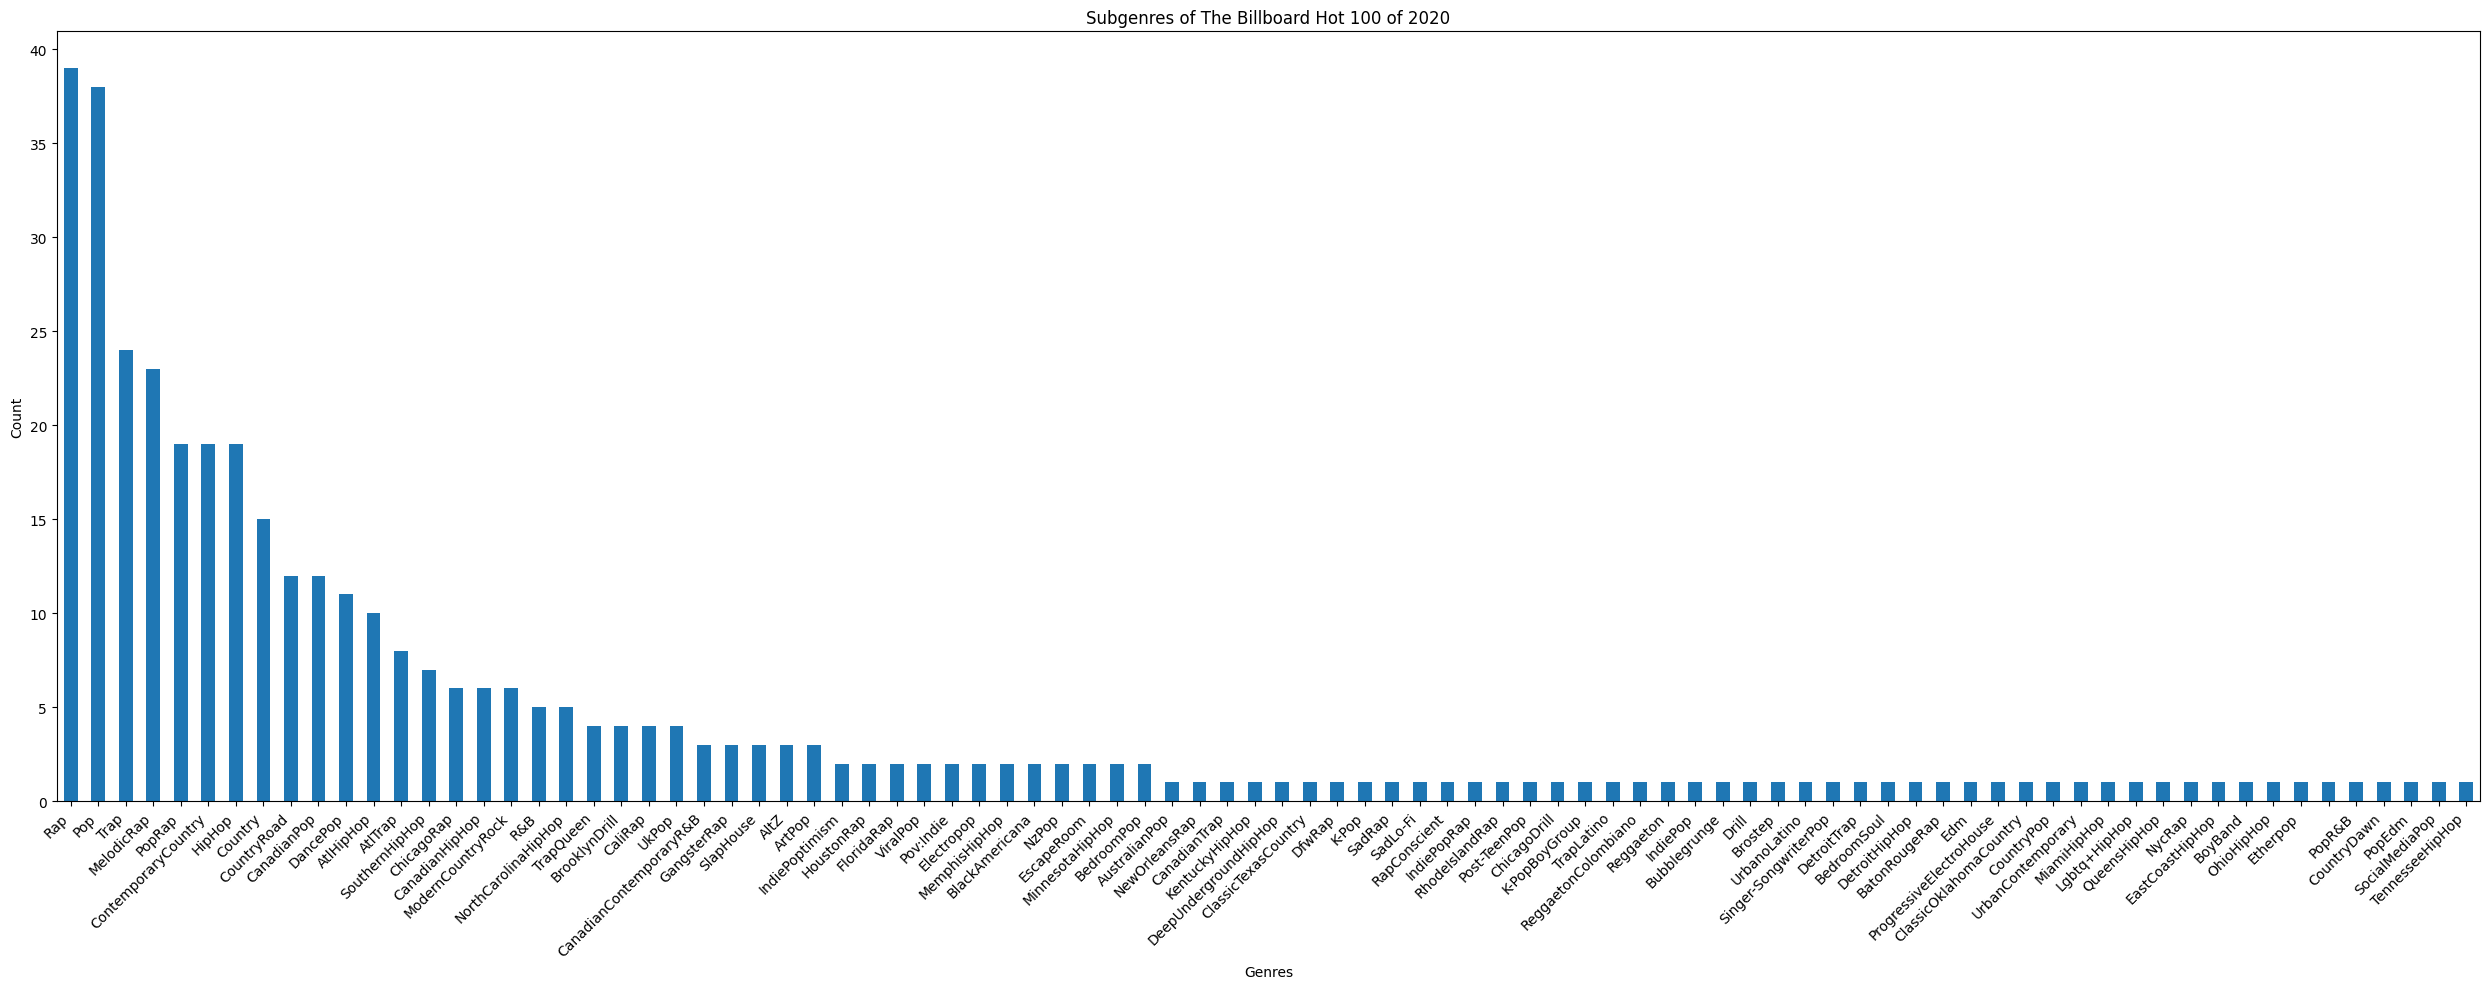

--------------------------------------------------
2021
Number of unique subgenre occurrences: 96


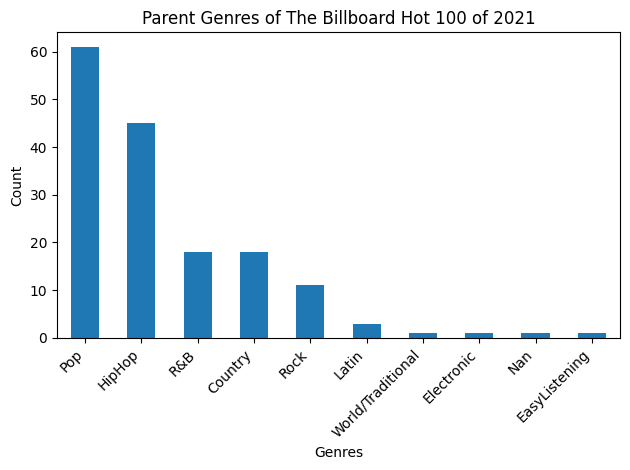

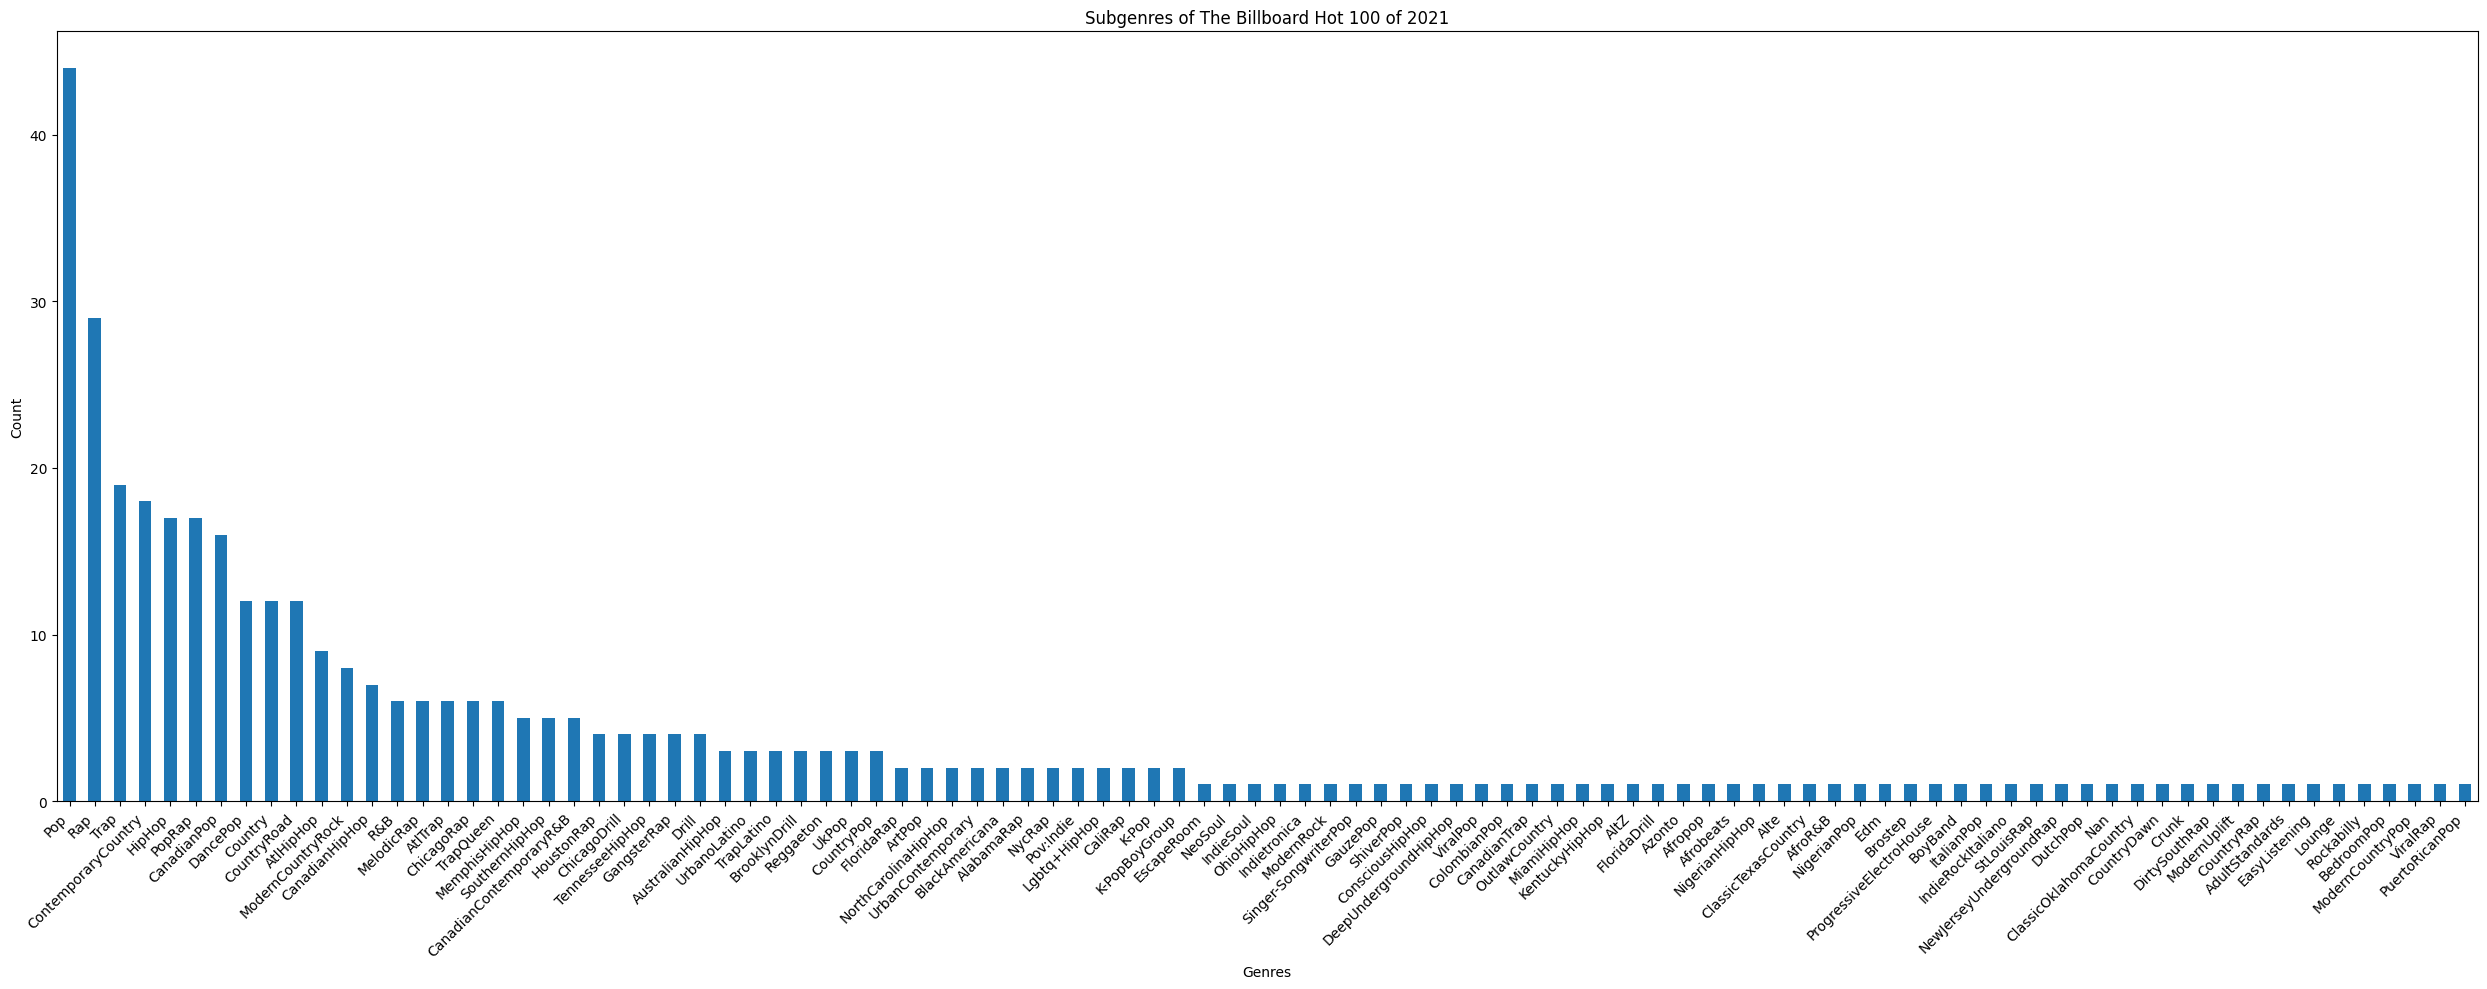

--------------------------------------------------
2022
Number of unique subgenre occurrences: 119


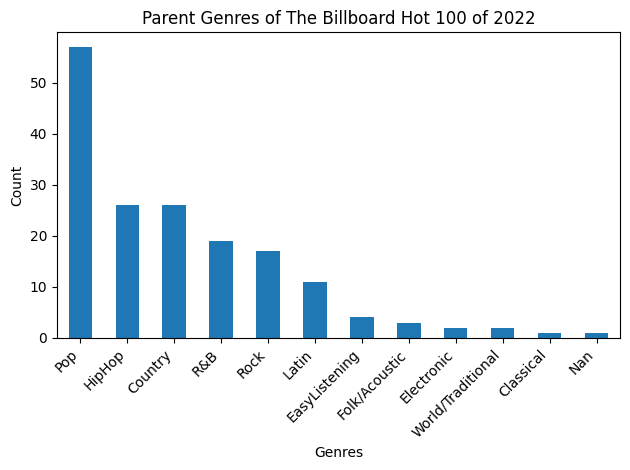

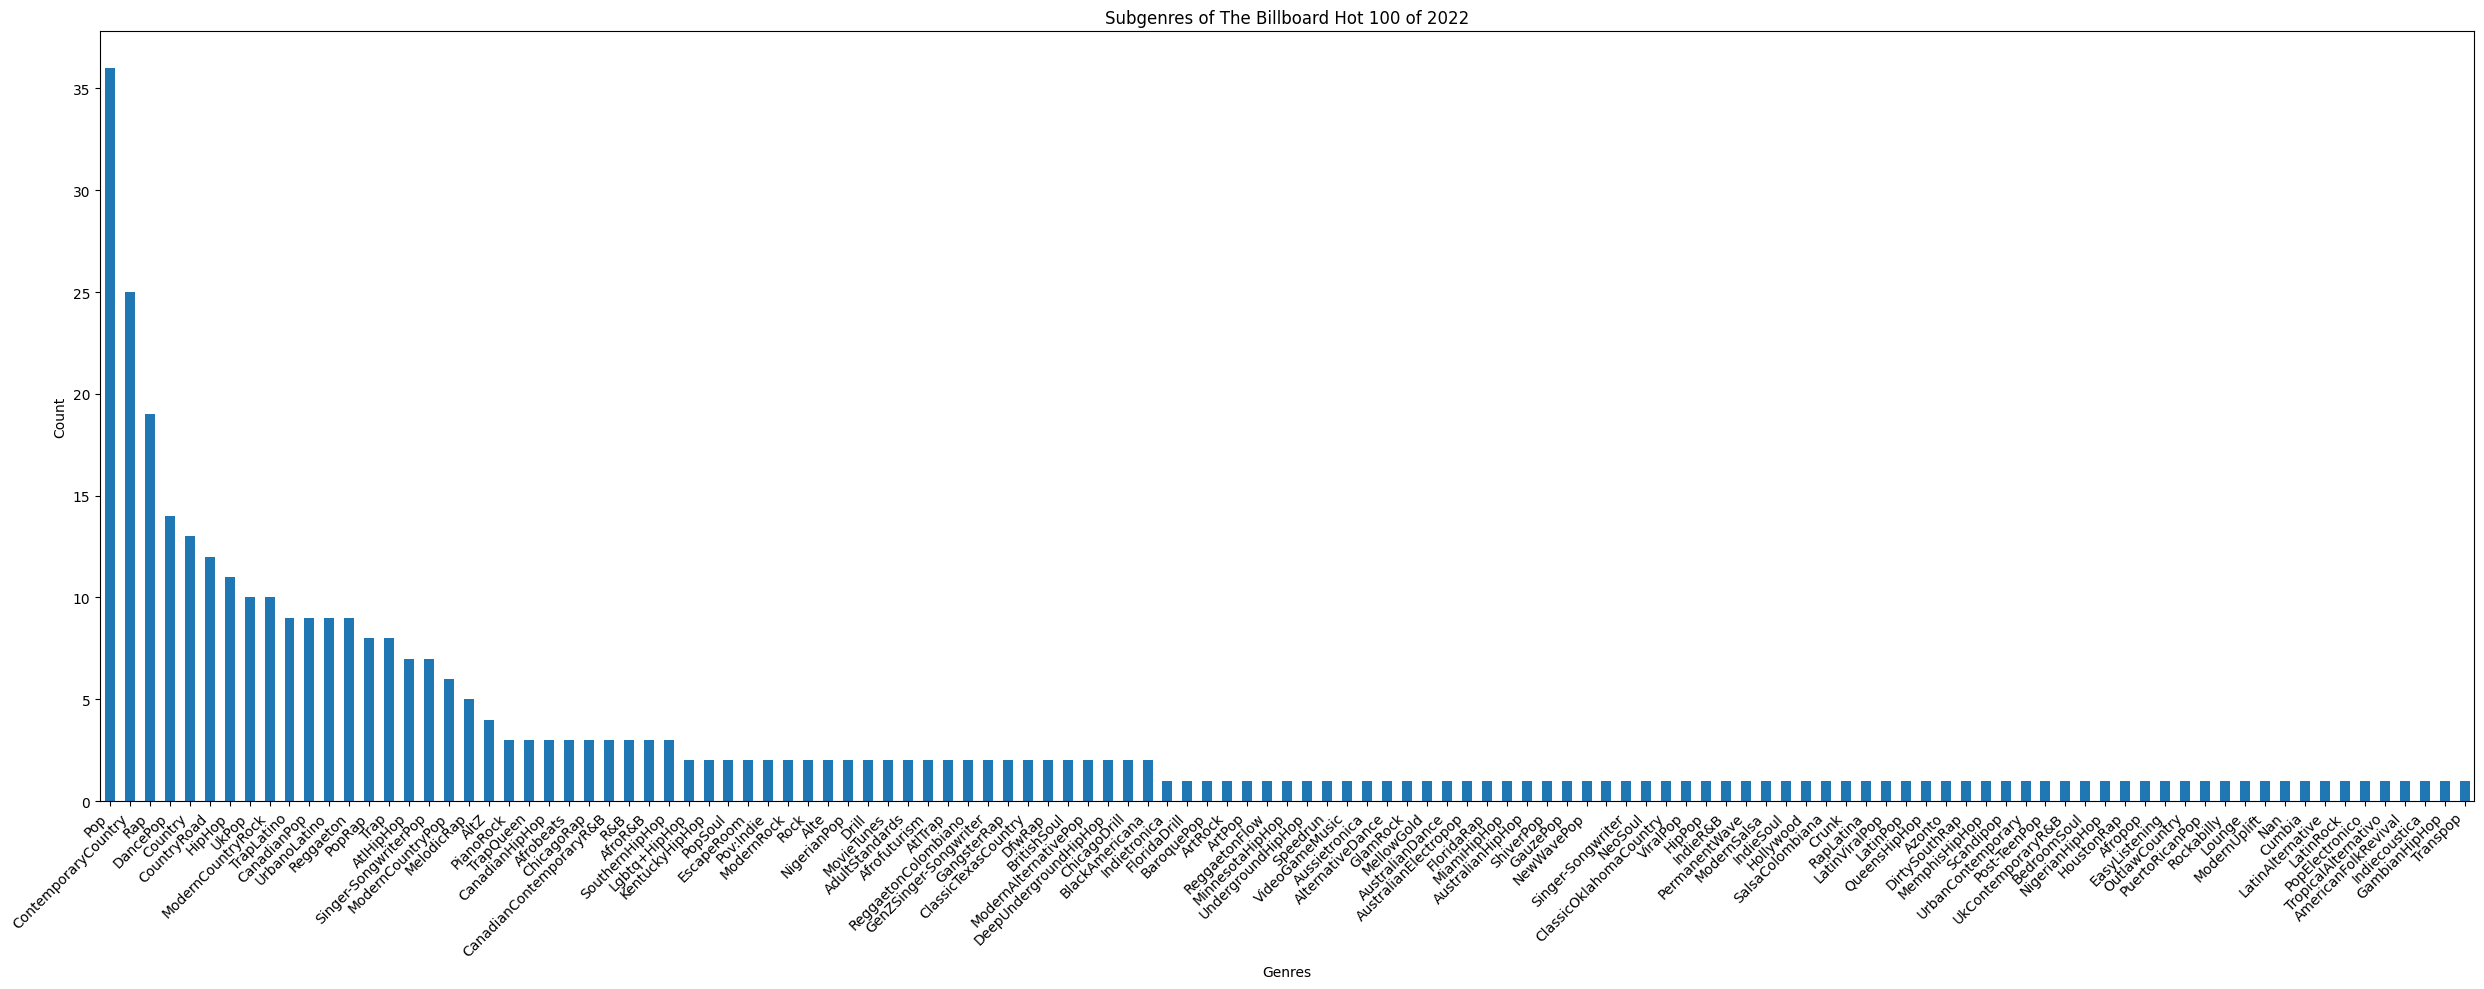

--------------------------------------------------
2023
Number of unique subgenre occurrences: 100


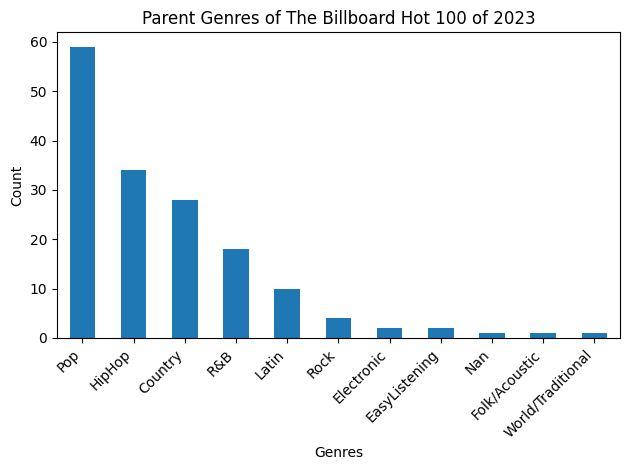

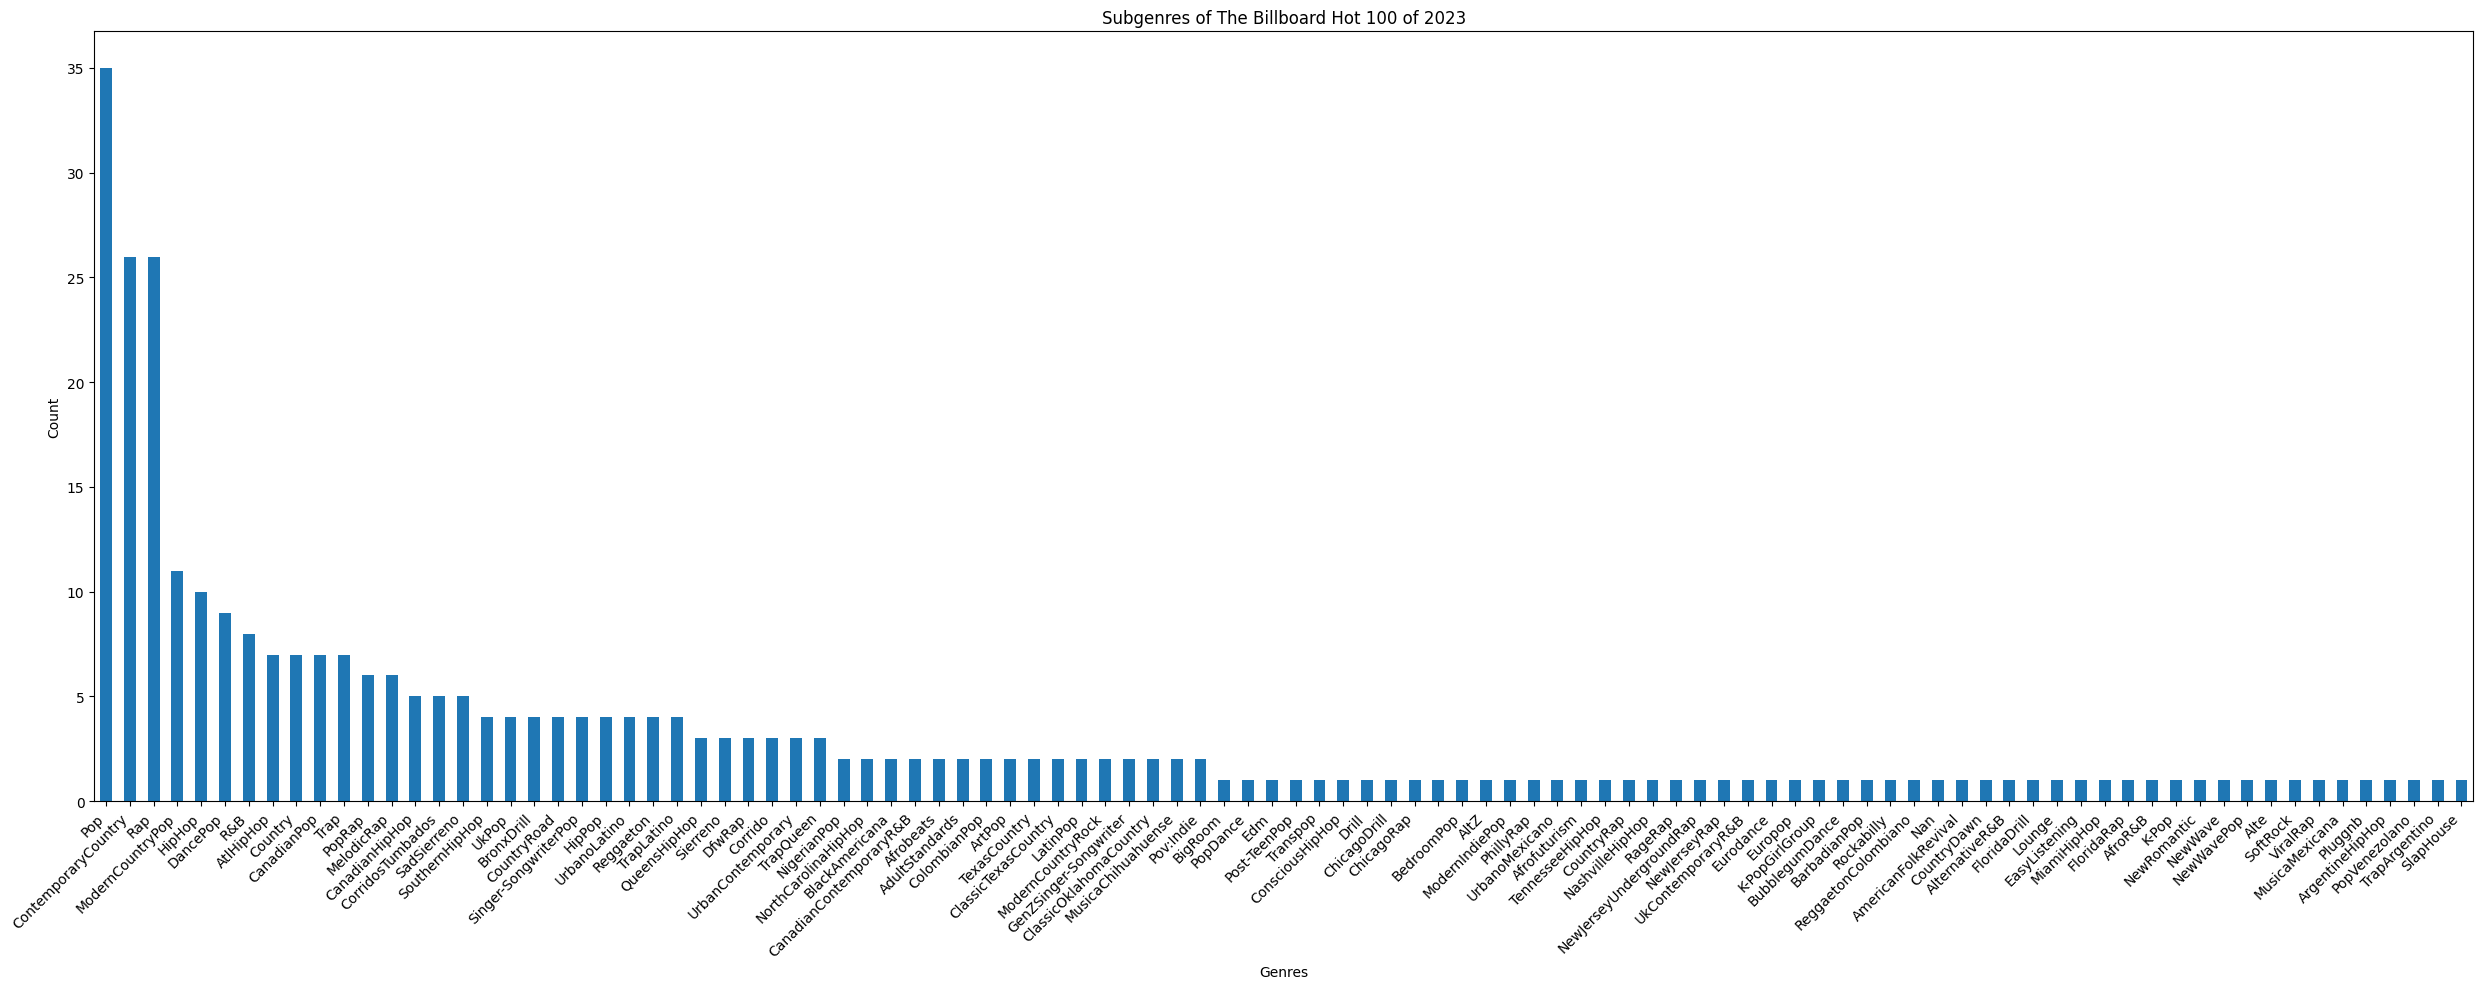

In [6]:
for index,df in enumerate(list_df):

    print(f'--------------------------------------------------\n{years[index]}\nNumber of unique subgenre occurrences: {list_num_unique_genres[index]}')
    
    plt.figure()
    list_values_parent_genres[index].plot(kind='bar')
    plt.title(f'Parent Genres of The Billboard Hot 100 of {years[index]}')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(25,10))
    list_values_genres[index].plot(kind='bar')
    plt.title(f'Subgenres of The Billboard Hot 100 of {years[index]}')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Genre predominance trends

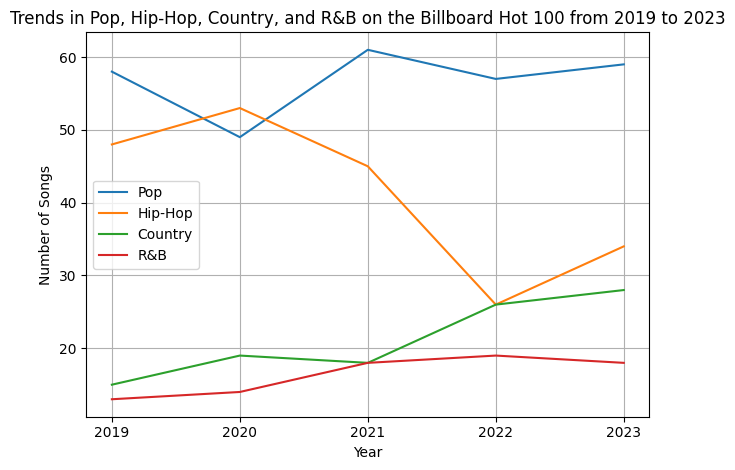

In [7]:
plt.figure()

plt.plot(years, list_num_pop, label='Pop')
plt.plot(years, list_num_hiphop, label='Hip-Hop')
plt.plot(years, list_num_country, label='Country')
plt.plot(years, list_num_rb, label='R&B')

plt.title(f'Trends in Pop, Hip-Hop, Country, and R&B on the Billboard Hot 100 from {years[0]} to {years[-1]}')
plt.xlabel('Year')
plt.ylabel('Number of Songs')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

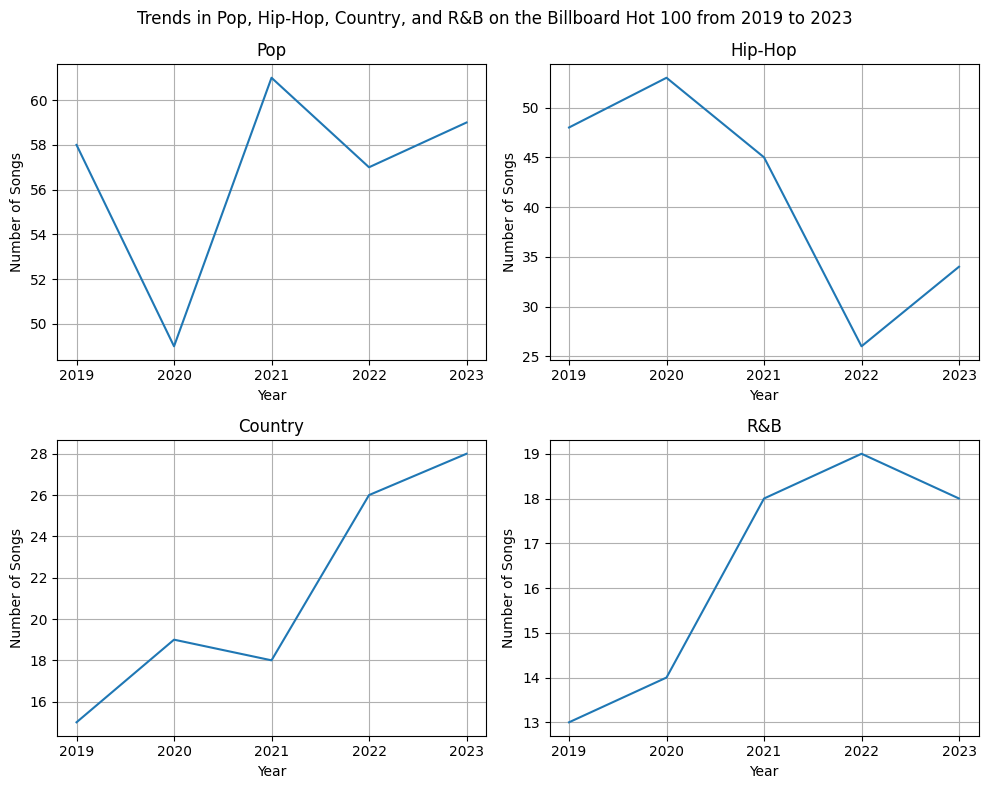

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle(f'Trends in Pop, Hip-Hop, Country, and R&B on the Billboard Hot 100 from {years[0]} to {years[-1]}')

axs[0, 0].plot(years, list_num_pop)
axs[0, 0].set_title('Pop')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Songs')
axs[0, 0].grid(True)

axs[0, 1].plot(years, list_num_hiphop)
axs[0, 1].set_title('Hip-Hop')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Number of Songs')
axs[0, 1].grid(True)

axs[1, 0].plot(years, list_num_country)
axs[1, 0].set_title('Country')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Songs')
axs[1, 0].grid(True)

axs[1, 1].plot(years, list_num_rb)
axs[1, 1].set_title('R&B')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Songs')
axs[1, 1].grid(True)

plt.tight_layout()

plt.show()

## BPM

count    500.00000
mean     121.40600
std       29.31614
min       60.00000
25%       97.75000
50%      120.00000
75%      142.00000
max      206.00000
Name: BPM, dtype: float64

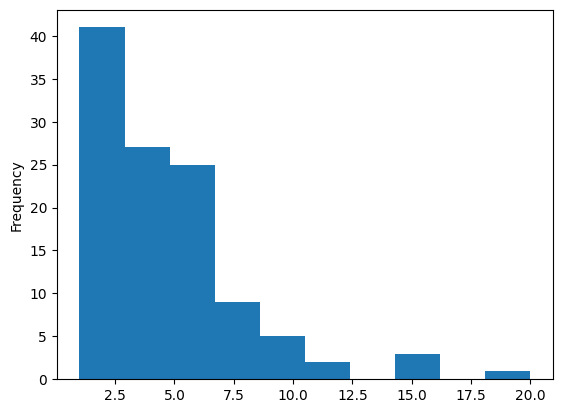

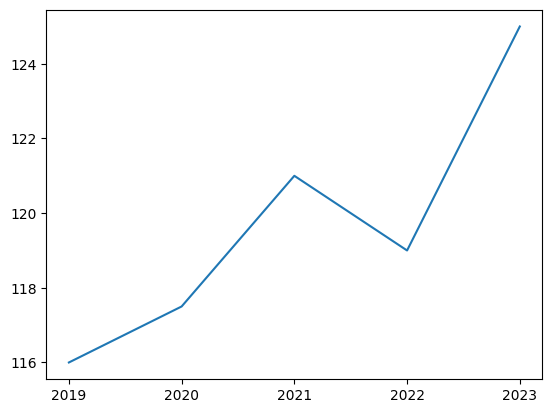

In [ ]:
display(df_all["BPM"].describe())
df_all["BPM"].value_counts().plot(kind="hist")
plt.show()
plt.plot(years,list_median_bpm)
plt.title(f'Median BPM of Top 100 Billboard Songs From {years[0]} To {years[-1]}')
plt.xlabel('Year')
plt.ylabel('BPM')
plt.show()


2019


count    100.000000
mean     119.380000
std       28.628509
min       60.000000
25%       96.750000
50%      116.000000
75%      140.000000
max      202.000000
Name: BPM, dtype: float64

116.0


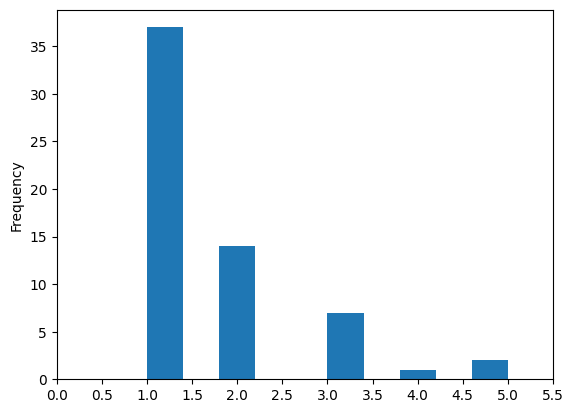

2020


count    100.000000
mean     119.480000
std       27.525004
min       75.000000
25%       97.000000
50%      117.500000
75%      140.500000
max      180.000000
Name: BPM, dtype: float64

117.5


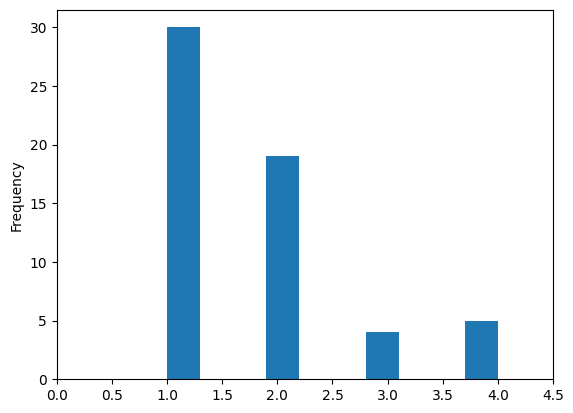

2021


count    100.000000
mean     119.130000
std       29.398913
min       67.000000
25%       92.500000
50%      121.000000
75%      138.500000
max      184.000000
Name: BPM, dtype: float64

121.0


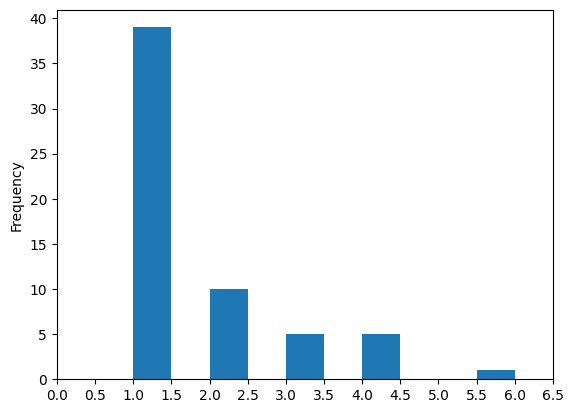

2022


count    100.000000
mean     122.770000
std       32.244287
min       67.000000
25%       99.500000
50%      119.000000
75%      142.500000
max      206.000000
Name: BPM, dtype: float64

119.0


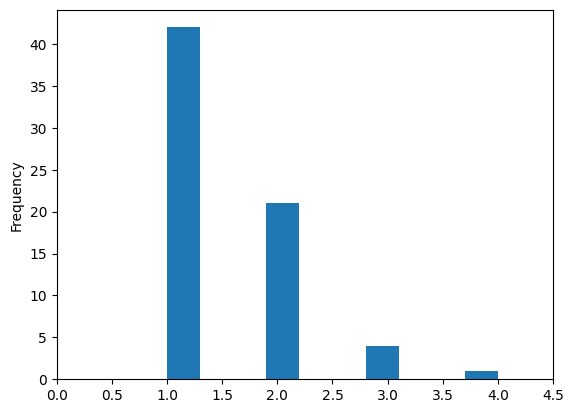

2023


count    100.000000
mean     126.270000
std       28.492017
min       67.000000
25%      104.750000
50%      125.000000
75%      144.250000
max      204.000000
Name: BPM, dtype: float64

125.0


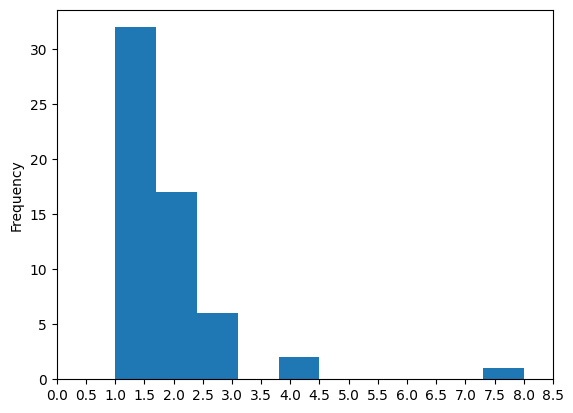

In [ ]:
for index,df in enumerate(list_df):
    print(years[index])
    display(df["BPM"].describe())
    df["BPM"].value_counts().plot(kind="hist")
    plt.xticks([x / 10.0 for x in range(0,(df["BPM"].value_counts().max()+1)*10,5)])
    plt.show()

## Artists

In [10]:
#display(num_repeats_artist.describe())
most_repeated_artist = str(num_repeats_artist.index[0]).strip("[]'")
most_repeated_artist_times = num_repeats_artist.values[0]
# Since the quartile 3 is equal 3, I decided to calculate the proportion of artists who entered the list equal or under 3 times and only once
perc_equal_under_two_repeated_artists = (num_repeats_artist <= 3).value_counts()[True]/num_artist * 100
perc_once_repeated_artists = (num_repeats_artist <= 1).value_counts()[True]/num_artist * 100
top_10_most_repeated_artists = num_repeats_artist.head(10)
reapeted_more_than_thrice_artists = num_repeats_artist[num_repeats_artist > 3]

The artist that appeared the most in the period studied was Drake, with a total of 23 times.
83.45% of the artists appear up to 3 times. 59.12% appeared only once.


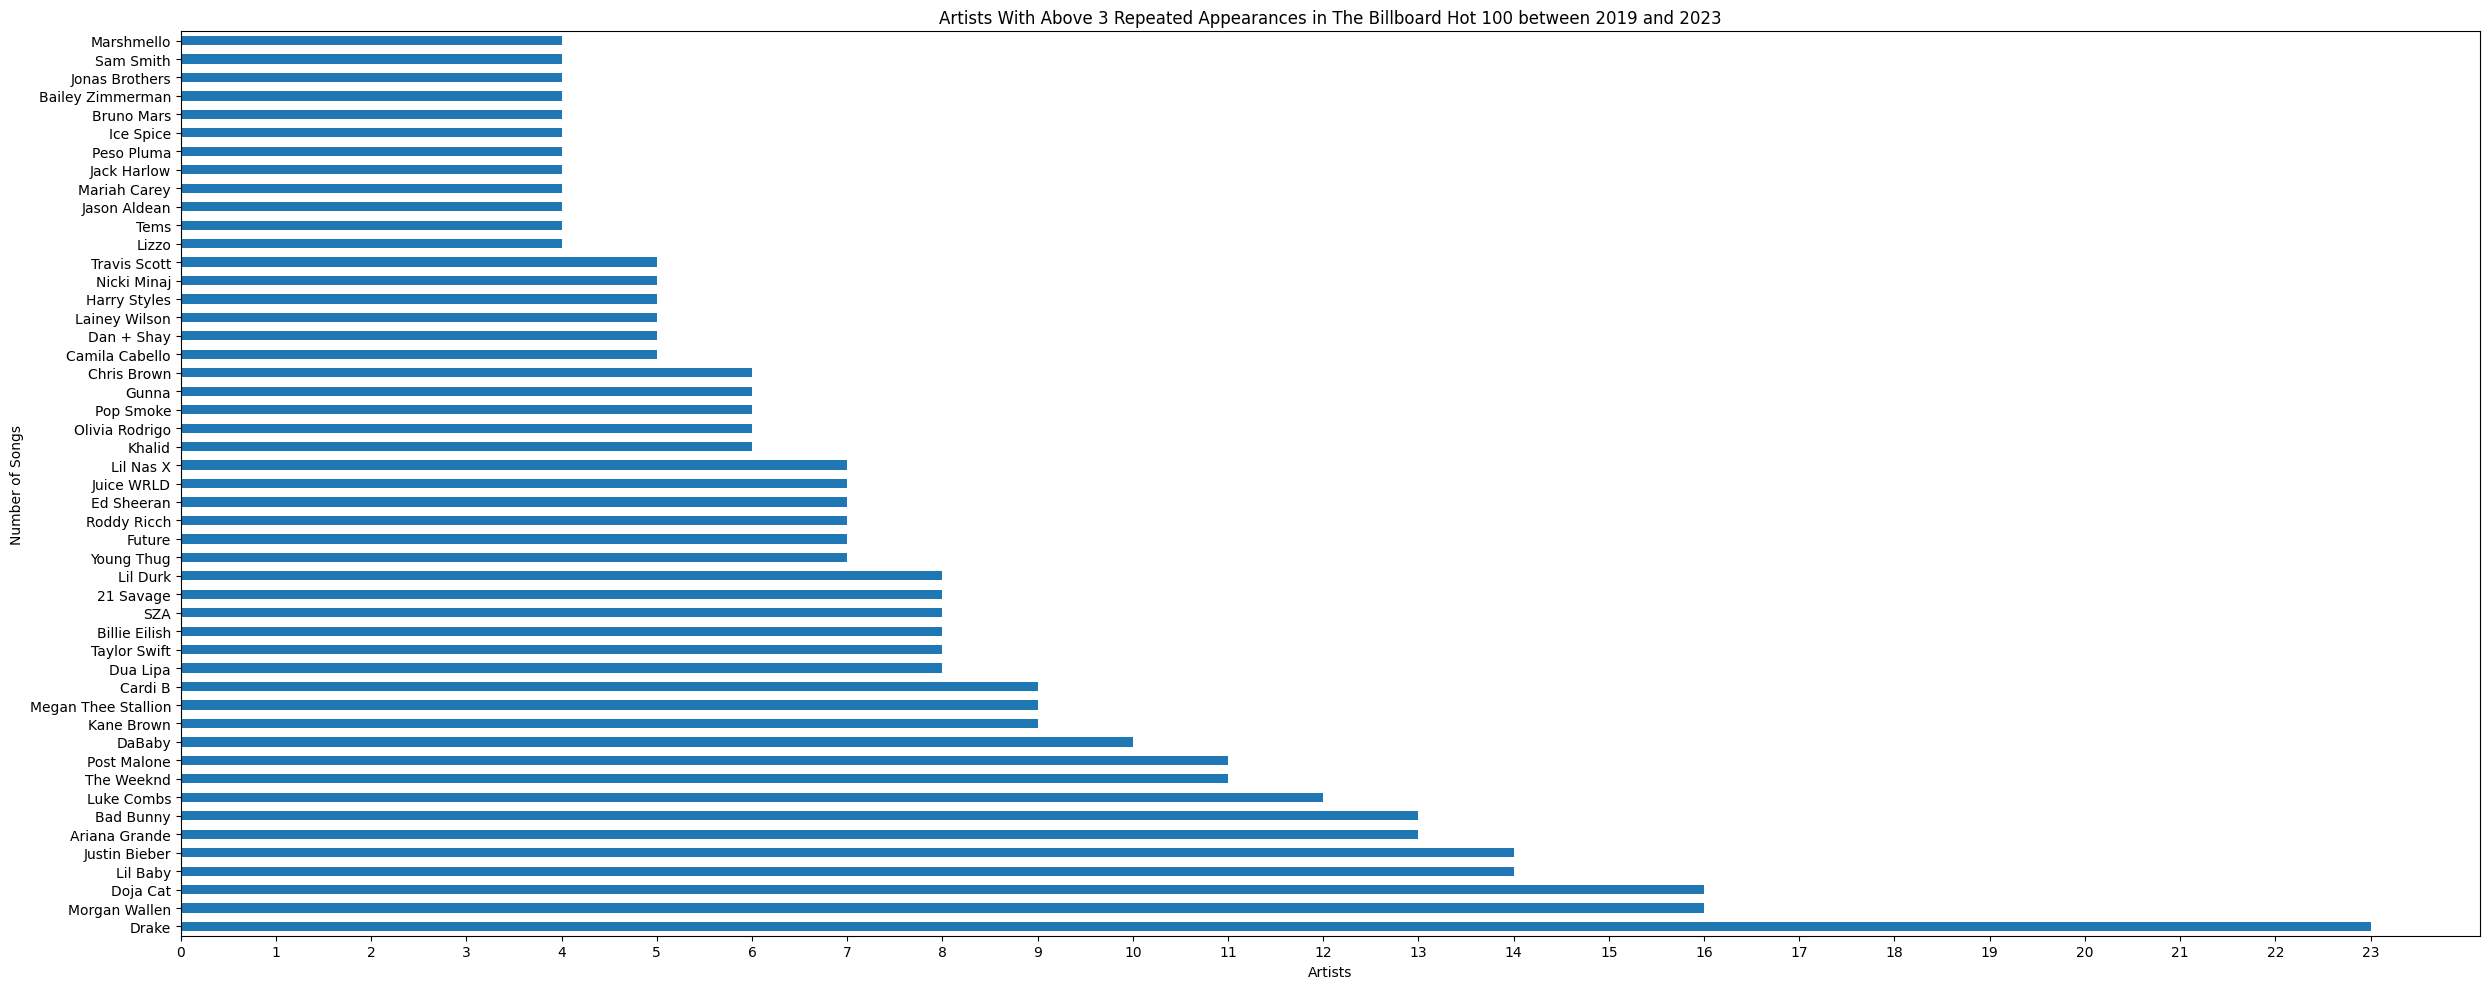

These are the 10 artists that appear the most:


Artist
Drake            23
Morgan Wallen    16
Doja Cat         16
Lil Baby         14
Justin Bieber    14
Ariana Grande    13
Bad Bunny        13
Luke Combs       12
The Weeknd       11
Post Malone      11
Name: count, dtype: int64

In [11]:
print(f"The artist that appeared the most in the period studied was {most_repeated_artist}, with a total of {most_repeated_artist_times} times.")
print(f"{perc_equal_under_two_repeated_artists:.4}% of the artists appear up to 3 times. {perc_once_repeated_artists:.4}% appeared only once.")

plt.figure(figsize=(25,10))
reapeted_more_than_thrice_artists.plot(kind='barh')
plt.title(f'Artists With Above 3 Repeated Appearances in The Billboard Hot 100 between {years[0]} and {years[-1]}')
plt.xlabel('Artists')
plt.ylabel('Number of Songs')
plt.xticks(range(0,reapeted_more_than_thrice_artists.max()+1))
plt.tight_layout()
plt.show()

print("These are the 10 artists that appear the most:")
display(top_10_most_repeated_artists)

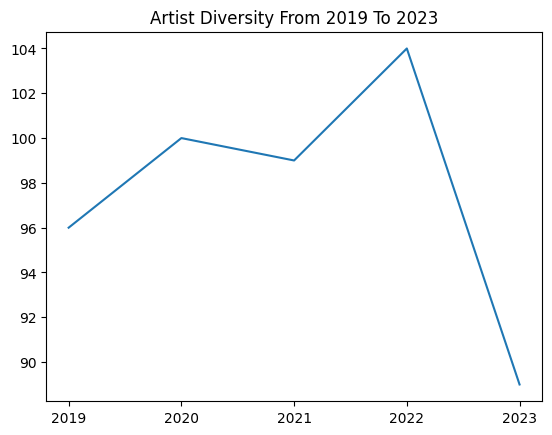

In [12]:
plt.Figure()
plt.plot(years,list_num_artist)
plt.title(f'Artist Diversity From {years[0]} To {years[-1]}')
plt.show()

In [13]:
for index,series in enumerate(list_num_repeats_artist):
    display(series.describe())

count    96.000000
mean      1.520833
std       0.962225
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: count, dtype: float64

count    100.000000
mean       1.480000
std        1.077596
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: count, dtype: float64

count    99.000000
mean      1.484848
std       1.072510
min       1.000000
25%       1.000000
50%       1.000000
75%       1.500000
max       6.000000
Name: count, dtype: float64

count    104.000000
mean       1.423077
std        1.030527
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: count, dtype: float64

count    89.000000
mean      1.539326
std       1.138741
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       8.000000
Name: count, dtype: float64